In [380]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import distance
import scipy
import statsmodels.api as sm
from venn import venn

In [206]:
df = pd.read_csv('/Users/Akashgupta/Desktop/NEWERFIN/disser/scores.csv')
df2 = pd.read_csv('/Users/Akashgupta/Desktop/NEWERFIN/disser/regressionfor3.csv')

In [207]:
df

,Unnamed: 0,REVIEW,score,LABELS
0,0,no would articles browse scanner super program...,8.5,pos
1,1,laptop earphone plug not correct connecting,-1.0,neg
2,2,smooth no fast heating laptop love issues best,7.5,pos
3,3,directly no hassle could november good after u...,-5.5,neg
4,4,not available port,-1.0,neg
...,...,...,...,...
1835,1835,laptop ssd range price under everything,5.0,pos
1836,1836,use fast boot lightning external mouse better ...,4.0,pos
1837,1837,man fab fast,1.5,pos
1838,1838,cant microsoft activate,0.0,neg


(array([  1.,   0.,   2.,   0.,   3.,   4.,  16.,  26.,  53., 126., 200.,
        323., 389., 294., 191.,  97.,  47.,  25.,  17.,   9.,   4.,   3.,
          4.,   2.,   0.,   0.,   1.,   1.,   1.,   1.]),
 array([-5.00443973, -4.60433617, -4.20423261, -3.80412905, -3.40402549,
        -3.00392193, -2.60381837, -2.2037148 , -1.80361124, -1.40350768,
        -1.00340412, -0.60330056, -0.203197  ,  0.19690656,  0.59701012,
         0.99711368,  1.39721724,  1.7973208 ,  2.19742436,  2.59752792,
         2.99763148,  3.39773504,  3.7978386 ,  4.19794216,  4.59804572,
         4.99814928,  5.39825284,  5.7983564 ,  6.19845996,  6.59856352,
         6.99866708]),
 <a list of 30 Patch objects>)

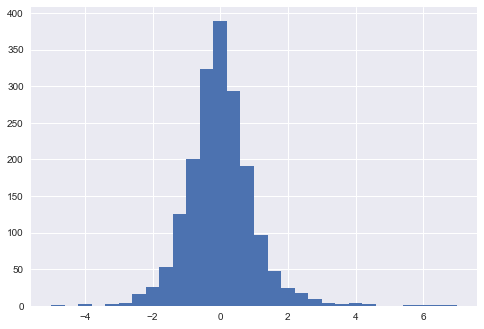

In [208]:
plt.hist(df2['scores'], bins=30)

In [209]:
df2['scores'] = np.round((df2['scores']*df['score'].std())+df['score'].mean())

In [210]:
df2[df2['scores']==df2['scores'].max()]

,Unnamed: 0,Unnamed: 0.1,reviews,brands,scores,performance,customers,pricelooks
1224,1224,1224,stays would feel still advices new perfect lan...,MAC,51.0,1,1,1


In [222]:
df2[df2['brands']=='MAC']['scores'].describe()

count    492.000000
mean       2.577236
std        8.966567
min      -33.000000
25%       -2.000000
50%        3.000000
75%        7.000000
max       51.000000
Name: scores, dtype: float64

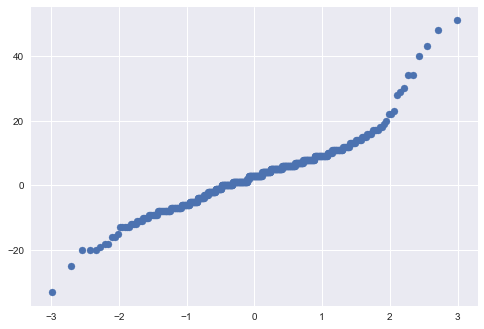

In [220]:
s = scipy.stats.probplot(df2[df2['brands']=='MAC']['scores'], dist='norm')
plt.scatter(s[0][0], s[0][1])

(array([  1.,   1.,   6.,  16.,  59., 101., 173.,  88.,  31.,   6.,   2.,
          4.,   0.,   2.,   2.]),
 array([-33. , -27.4, -21.8, -16.2, -10.6,  -5. ,   0.6,   6.2,  11.8,
         17.4,  23. ,  28.6,  34.2,  39.8,  45.4,  51. ]),
 <a list of 15 Patch objects>)

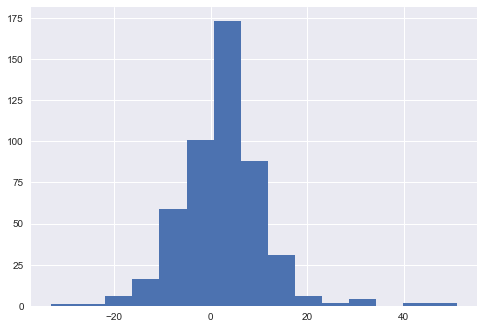

In [221]:
plt.hist(df2[df2['brands']=='MAC']['scores'], bins=15)

(array([  7.,  12.,  18.,  42., 122., 111.,  71.,  35.,  36.,  23.,   5.,
          2.,   1.,   0.,   1.]),
 array([-16.        , -13.13333333, -10.26666667,  -7.4       ,
         -4.53333333,  -1.66666667,   1.2       ,   4.06666667,
          6.93333333,   9.8       ,  12.66666667,  15.53333333,
         18.4       ,  21.26666667,  24.13333333,  27.        ]),
 <a list of 15 Patch objects>)

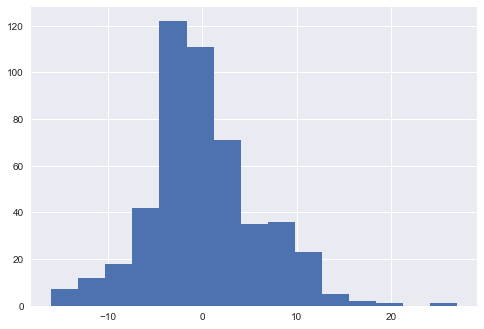

In [110]:
plt.hist(df2[df2['brands']=='LEN']['scores'], bins=15)

In [223]:
scipy.stats.ttest_ind(df2[df2['brands']=='HP']['scores'], df2[df2['brands']=='LEN']['scores'],
                      equal_var=True)

Ttest_indResult(statistic=5.600303050577039, pvalue=2.866926734600772e-08)

In [234]:
scipy.stats.ttest_ind(df2[df2['brands']=='MAC']['scores'], df2[df2['brands']=='DELL']['scores'],
                      equal_var=True)

Ttest_indResult(statistic=-0.9948193196046472, pvalue=0.3200740460359333)

In [236]:
scipy.stats.ttest_ind(df2[df2['brands']=='MAC']['scores'], df2[df2['brands']=='LEN']['scores'],
                      equal_var=False)

Ttest_indResult(statistic=5.010004235638454, pvalue=6.623088930115716e-07)

In [235]:
scipy.stats.ttest_ind(df2[df2['brands']=='MAC']['scores'], df2[df2['brands']=='HP']['scores'],
                      equal_var=False)

Ttest_indResult(statistic=0.45998654256710897, pvalue=0.6456450913149347)

In [237]:
DD = df2[df2['brands'].isin(['HP', 'LEN'])]

In [438]:
regex = r'[a-zA-Z]{2,20}'
tfidf = CountVectorizer(token_pattern=regex)
TDM = tfidf.fit_transform(DD['reviews'])
matrix = pd.DataFrame(TDM.toarray(), columns=tfidf.get_feature_names())

In [426]:
matrix['slow']

0       0
1       0
2       0
3       0
4       0
       ..
1835    0
1836    0
1837    0
1838    0
1839    0
Name: slow, Length: 1840, dtype: int64

In [135]:
doc_vecs = (TDM*TDM.T).toarray()

In [136]:
D = pd.DataFrame(doc_vecs)
D.head()

,0,1,2,3,4,5,6,7,8,9,...,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839
0,61,2,2,8,1,4,2,2,2,6,...,1,4,1,2,0,1,1,0,0,0
1,2,6,1,2,1,1,1,1,1,2,...,1,0,0,1,0,1,0,0,0,0
2,2,1,8,2,0,1,0,0,0,2,...,0,2,0,0,0,1,1,1,0,0
3,8,2,2,72,1,2,1,2,3,10,...,1,4,0,3,0,1,0,0,0,0
4,1,1,0,1,3,0,1,1,1,1,...,1,0,0,1,0,0,0,0,0,0


In [266]:
svd = TruncatedSVD(n_components=150, n_iter=9, random_state=42)
svd.fit(TDM)
result = svd.transform(TDM)
svd.explained_variance_ratio_.sum()

0.7220105960151609

In [439]:
def cos_sim(a, b):
    cs = (np.dot(a, b))/(np.linalg.norm(a)*np.linalg.norm(b))
    return cs

In [524]:
cos_sim(matrix['display'], matrix['lenovo'])

0.04193139346887673

In [157]:
df2.iloc[1]

Unnamed: 0                                                      1
Unnamed: 0.1                                                    1
reviews         used not clearly frequently dull become sleek ...
brands                                                         HP
scores                                                          1
performance                                                     1
customers                                                       0
pricelooks                                                      1
Name: 1, dtype: object

In [241]:
df['REVIEW'][1]

'laptop earphone plug not correct connecting'

In [58]:
df['REVIEW'][150]

"received defective piece first run behind hp dead arrival letter claim return amazon amazon won't pick up item even though eligible return since past days disappointing experience buying electronics amazon apart form laptop good pick only not via online medium highly recommended purchase offline instead"

In [242]:
print(svd.singular_values_)

[35.35778523 17.25658052 15.53817247 15.34067667 14.20375203 13.65057
 13.34478747 12.36715319 12.19060576 11.99678821 11.69975852 11.36926797
 11.17564865 11.12361304 10.95541176 10.766084   10.66450658 10.64549862
 10.23614395 10.19303659 10.09126384  9.9484283   9.75579683  9.69708772
  9.61122846  9.37211563  9.25240561  9.21125166  9.16446821  9.14344688
  9.03678208  8.96843031  8.90480935  8.82513762  8.7699055   8.71333497
  8.64035132  8.5638012   8.46694828  8.4205546   8.33522147  8.31527658
  8.28151756  8.18323153  8.1401601   8.02877857  8.00415894  7.92434926
  7.88349363  7.87844995  7.82655988  7.74186299  7.7147722   7.65843632
  7.62967374  7.56667564  7.51345985  7.48938482  7.43902417  7.38181687
  7.32082427  7.31303034  7.28529689  7.19880529  7.17142524  7.14698239
  7.09213282  7.05136764  6.99786274  6.9592982   6.90371156  6.8448971
  6.80359825  6.76928756  6.74923809  6.73538773  6.68811237  6.64242032
  6.6267439   6.5862159   6.55027793  6.5381756   6.523

In [243]:
result.shape

(875, 150)

In [244]:
svd.explained_variance_ratio_.sum()

0.7220105960151605

In [245]:
rss = {}
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=300000).fit(result)
    rss[i] = kmeans.inertia_

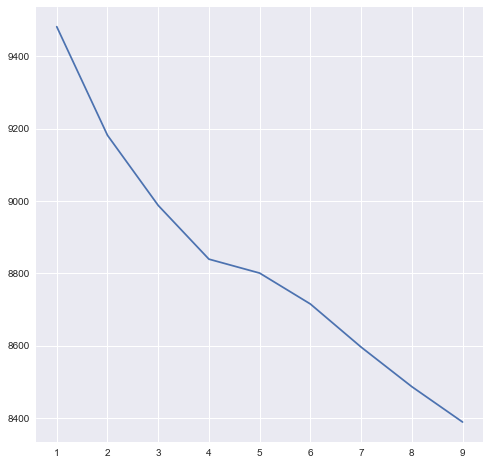

In [246]:
plt.figure(figsize=(8,8))
plt.plot(list(rss.keys()), list(rss.values()))

In [247]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(result)
y_kmeans = kmeans.predict(result)

In [269]:
DDD = DD.copy()
DDD['cluster'] = y_kmeans
DDD['cluster'].value_counts()

1    426
3    253
0    151
2     45
Name: cluster, dtype: int64

In [270]:
h = DDD[DDD['cluster']==0]
hh = DDD[DDD['cluster']==1]
hhh = DDD[DDD['cluster']==2]
hhhh = DDD[DDD['cluster']==3]

In [322]:
len(hhhh)

253

In [324]:
h0 = pd.DataFrame()
h0['scores'] = h['scores']
h0['cluster'] = [0 for i in range(151)]

h1 = pd.DataFrame()
h1['scores'] = hh['scores']
h1['cluster'] = [1 for i in range(426)]

h2 = pd.DataFrame()
h2['scores'] = hhh['scores']
h2['cluster'] = [2 for i in range(45)]

h3 = pd.DataFrame()
h3['scores'] = hhhh['scores']
h3['cluster'] = [3 for i in range(253)]

In [326]:
T = pd.concat([h0, h1, h2, h3])

In [327]:
T

,scores,cluster
1,1.0,0
5,-3.0,0
23,-9.0,0
26,18.0,0
31,-13.0,0
...,...,...
869,-1.0,3
870,4.0,3
875,1.0,3
877,1.0,3


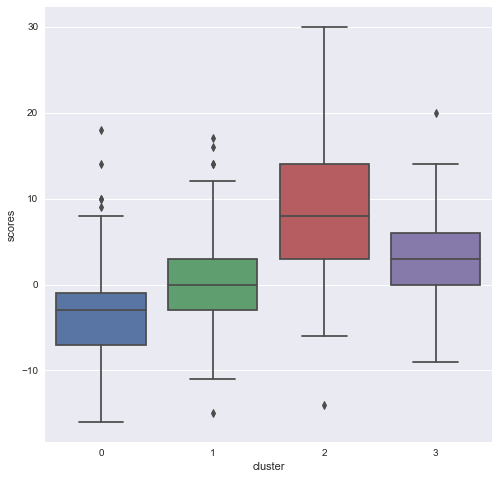

In [330]:
plt.figure(figsize=(8,8))
sns.boxplot(x='cluster', y='scores', data=T)

In [306]:
G = pd.DataFrame()
G['cluster_0'] = h['scores']
G['cluster_1'] = hh['scores']
G['cluster_2'] = hhh['scores']
G['cluster_3'] = hhhh['scores']
G

,cluster_0,cluster_1,cluster_2,cluster_3
1,1.0,NaN,NaN,NaN
5,-3.0,NaN,NaN,NaN
23,-9.0,NaN,NaN,NaN
26,18.0,NaN,NaN,NaN
31,-13.0,NaN,NaN,NaN
...,...,...,...,...
823,-3.0,NaN,NaN,NaN
836,-3.0,NaN,NaN,NaN
848,-6.0,NaN,NaN,NaN
859,-3.0,NaN,NaN,NaN


In [342]:
class L_stats(object):
    def __init__(self, raw, col_name):
        self.raw = raw
        self.col_name = col_name
        
    def tokenized(self):
        tokens = []
        for review in self.raw[self.col_name]:
            tokens.append([w.lower() for w in nltk.word_tokenize(review) if len(w)>1])
        return tokens
    
    def bi_token(self):
        bitokens = []
        tokendata = self.tokenized()
        for review in tokendata:
            bitokens.append(list(nltk.bigrams(review)))
        return bitokens
    
    def vocab(self):
        voc = []
        for review in self.raw[self.col_name]:
            voc += [w.lower() for w in nltk.word_tokenize(review) if len(w)>1]
        return voc
    
    def tokenized_uni(self):
        tokens = []
        for review in self.raw[self.col_name]:
            tokens.append(list(set([w.lower() for w in nltk.word_tokenize(review) if len(w)>1])))
        return tokens
    
    def vocab_uni(self):
        voc = []
        for review in self.raw[self.col_name]:
            voc += [w.lower() for w in nltk.word_tokenize(review) if len(w)>1]
        return list(set(voc))
    
    def avg_word_count(self):
        avg = 0
        v = self.tokenized()
        for review in v:
            avg += (len(review)/len(v))
        avg = np.round(avg, 2)
        return avg
    
    def tokenized_no_stops(self):
        DF = []
        c = self.tokenized()
        for r in c:
            DF.append([w.lower() for w in r if w.lower() not in stopwords.words('english')])
        return DF
    
    def vocab_no_stops(self):
        v = self.vocab()
        d = [w.lower() for w in v if w.lower() not in stopwords.words('english')]
        return d
    
    def count_stats(self):
        print("Total number of words in all reviews: ", len(self.vocab()))
        print()
        print("Average number of words in each review: ", self.avg_word_count())
        print()
        print("Total number of words in all reviews without stopwords", len(self.vocab_no_stops()))
         
    def frequencies(self):
        print("Top 30 most frequently occurring words in the dataset, along with their count:")
        print()
        var2 = nltk.FreqDist(self.vocab()).most_common(30)
        for i in range(30):
            print(var2[i])
    
    def frequencies_stop(self):
        print("Top 60 most frequently occurring words in the data without stops, along with their count:")
        print()
        var = nltk.FreqDist(self.vocab_no_stops()).most_common(60)
        for i in range(60):
            print(var[i])
    
    def hapaxes(self):
        print("Top 60 most rare words that occur only once in the review dataset:")
        print()
        vvv = self.vocab()
        var3 = nltk.FreqDist(vvv).hapaxes()
        for i in range(60):
            print(var3[i])
            
    def collocation(self):
        print("Most frequent bigrams (pairs of words): ")
        print()
        v4 = self.vocab()
        t = nltk.Text(v4)
        print(t.collocations_list())
        #print()
        #dft = self.tokenized()
        #for r in dft:
            #t = nltk.Text(r)
            #if t.collocations() != None:
                #print(t.collocations())
                
    def concord(self, word):
        vs = self.vocab()
        tt = nltk.Text(vs)
        print(tt.concordance(word))
        
    def find_bigrams(self, word):
        vv = self.vocab()
        t6 = nltk.Text(vv)
        print(t6.findall(r'<{}> <.*>'.format(word)))
        
    def nouns(self):
        vvs = self.vocab()
        nouns = [w for (w, n) in nltk.pos_tag(vvs) if n in ['NN', 'NNP']]
        return nouns

In [343]:
d = L_stats(h, 'reviews')
dd = L_stats(hh, 'reviews')
ddd = L_stats(hhh, 'reviews')
dddd = L_stats(hhhh, 'reviews')

In [337]:
d.count_stats()

Total number of words in all reviews:  4050

Average number of words in each review:  26.82

Total number of words in all reviews without stopwords 3405


In [338]:
dd.count_stats()

Total number of words in all reviews:  3934

Average number of words in each review:  9.23

Total number of words in all reviews without stopwords 3502


In [339]:
ddd.count_stats()

Total number of words in all reviews:  2730

Average number of words in each review:  60.67

Total number of words in all reviews without stopwords 2412


In [340]:
dddd.count_stats()

Total number of words in all reviews:  3294

Average number of words in each review:  13.02

Total number of words in all reviews without stopwords 2971


In [358]:
h['brands'].value_counts()

LEN    111
HP      40
Name: brands, dtype: int64

In [299]:
h['scores'].std()

6.068032255397018

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3bc81310>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3bc81dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3bc79710>],
 'medians': [<matplotlib.lines.Line2D at 0x1c3bd34850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3bd34d50>],
 'means': []}

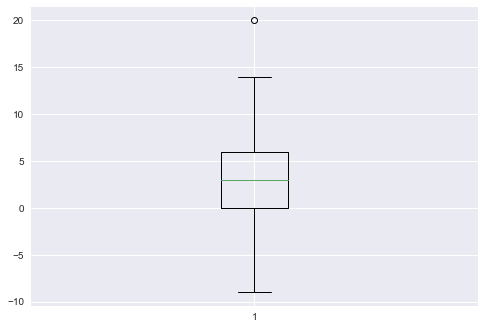

In [303]:
plt.boxplot(hhhh['scores'])

In [344]:
d.frequencies_stop()

Top 60 most frequently occurring words in the data without stops, along with their count:

('laptop', 120)
("n't", 59)
('buy', 58)
('product', 43)
('slow', 42)
('even', 34)
('working', 30)
('amazon', 29)
('battery', 29)
('worst', 26)
('one', 23)
('money', 23)
('better', 23)
('time', 22)
('bad', 22)
('bought', 20)
('lenovo', 19)
('return', 18)
('like', 18)
('life', 17)
('poor', 17)
('also', 17)
('service', 16)
('months', 16)
('takes', 16)
('quality', 16)
('work', 16)
('please', 16)
('ever', 15)
('use', 15)
('days', 15)
('purchase', 15)
('processor', 14)
('used', 13)
('item', 13)
('go', 13)
('start', 13)
('using', 13)
('purchased', 13)
('experience', 12)
('customer', 12)
('performance', 12)
('ram', 12)
('waste', 11)
('camera', 11)
('online', 11)
('price', 11)
('display', 11)
('want', 10)
('month', 10)
('new', 10)
('suggest', 10)
('take', 10)
('issue', 10)
('still', 10)
('never', 9)
('problem', 9)
('old', 9)
('since', 9)
('warranty', 9)


In [345]:
ddd.frequencies_stop()

Top 60 most frequently occurring words in the data without stops, along with their count:

('laptop', 33)
('good', 32)
('battery', 31)
('quality', 27)
('performance', 23)
('office', 20)
('also', 18)
('ssd', 18)
('price', 16)
("n't", 16)
('like', 16)
('use', 16)
('one', 15)
('light', 15)
('go', 15)
('windows', 14)
('hours', 14)
('weight', 14)
('fast', 13)
('processor', 13)
('backup', 13)
('buy', 12)
('ms', 12)
('ram', 12)
('cons', 12)
('better', 12)
('build', 12)
('overall', 11)
('laptops', 11)
('life', 11)
('pros', 11)
('gaming', 11)
('display', 11)
('time', 10)
('usage', 10)
('product', 10)
('poor', 10)
('using', 9)
('review', 9)
('well', 9)
('average', 9)
('design', 9)
('installed', 9)
('money', 8)
('value', 8)
('gb', 8)
('want', 8)
('students', 8)
('low', 8)
('could', 8)
('sound', 8)
('much', 8)
('system', 8)
('camera', 8)
('range', 8)
('first', 8)
("'s", 8)
('work', 7)
('takes', 7)
('purchased', 7)


In [183]:
ddd.frequencies_stop()

Top 30 most frequently occurring words in the data without stops, along with their count:

('battery', 50)
('good', 47)
('quality', 44)
('laptop', 36)
('performance', 27)
('also', 22)
('life', 20)
('ssd', 18)
('price', 18)
('office', 18)
('light', 17)
('hours', 17)
('backup', 17)
('camera', 17)
('one', 16)
('weight', 16)
("n't", 15)
('gaming', 15)
('best', 14)
('like', 13)
('cons', 13)
('windows', 13)
('build', 13)
('go', 13)
('use', 13)
('poor', 13)
('fast', 12)
('low', 12)
('pros', 12)
('processor', 12)


In [500]:
d.concord('slow')

Displaying 25 of 42 matches:
 processing rubbish laptop purchased slow absolutely ram years sincere than fa
 since bought like table days laptop slow surface within mins it heating than 
ng urgent wrost battery laptop money slow also backup dont not refundable buy 
hangs go money play well like laptop slow alot invest more less will start ple
ngf only do n't clicking laptop show slow working making showpiece running pro
may total amazon play support laptop slow plastic fact extremely screen acknow
e click maximum after battery laptop slow also ever wait mins have worst hours
ad follow warranty made attended did slow working response replacement request
 should get serving there did laptop slow option don little exchange purpose d
processors took refreshed one laptop slow almost suggest performance mins wont
utes keyboard months take use laptop slow working refresh more screen 've it '
only saved speed window trash laptop slow one 's using seconds react even else
dated hand amazon shoul

In [503]:
hhh['brands'].value_counts()

HP     23
LEN    22
Name: brands, dtype: int64

In [502]:
hhh

,Unnamed: 0,Unnamed: 0.1,reviews,brands,scores,performance,customers,pricelooks,cluster
21,21,21,good after hour activate also writing performa...,HP,9.0,1,0,1,2
24,24,24,upgrade single still super rams fast setup she...,HP,11.0,1,1,1,2
27,27,27,no single still boot starts while fast crystal...,HP,30.0,1,1,1,2
44,44,44,no prodiess good after would processor also bo...,HP,17.0,1,0,1,2
49,49,49,good consider processor also specifications lu...,HP,8.0,1,0,1,2
120,120,120,gen single good saving weak would alone proces...,HP,17.0,1,1,1,2
121,121,121,no life good track still here design performan...,HP,24.0,1,0,1,2
132,132,132,gen installed no could good web backlight fest...,HP,11.0,1,0,1,2
140,140,140,touchpad quite good heavily speakers which pri...,HP,18.0,1,1,1,2
144,144,144,needful single viable cover probably budget fa...,HP,13.0,1,1,1,2


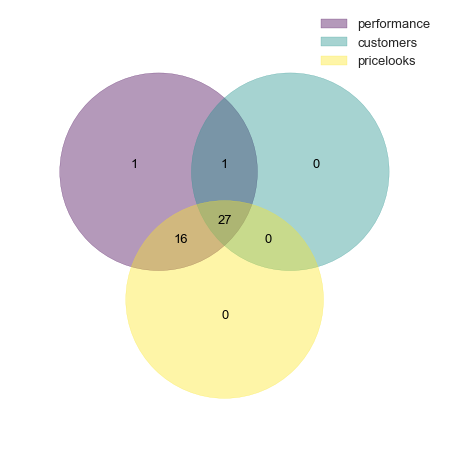

In [501]:
H_13 = {'performance': set(hhh[hhh['performance']==1]['reviews']), 
        'customers': set(hhh[hhh['customers']==1]['reviews']),
        'pricelooks': set(hhh[hhh['pricelooks']==1]['reviews'])}
venn(H_13)

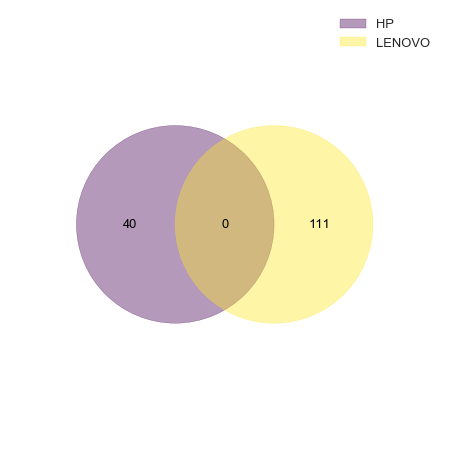

In [382]:
H_23 = {'HP': set(h[h['brands']=='HP']['reviews']), 
        'LENOVO': set(h[h['brands']=='LEN']['reviews'])}
venn(H_23)

In [347]:
d_nouns = list(set(d.nouns()) - set(dd.nouns()).intersection(set(d.nouns()))
               -set(ddd.nouns()).intersection(set(d.nouns()))
               -set(dddd.nouns()).intersection(set(d.nouns())))

In [348]:
dd_nouns = list(set(dd.nouns()) - set(d.nouns()).intersection(set(dd.nouns()))
               -set(ddd.nouns()).intersection(set(dd.nouns()))
               -set(dddd.nouns()).intersection(set(dd.nouns())))

In [525]:
ddd_nouns = list(set(ddd.nouns()) - set(dd.nouns()).intersection(set(ddd.nouns()))
               -set(d.nouns()).intersection(set(ddd.nouns()))
               -set(dddd.nouns()).intersection(set(ddd.nouns())))

In [526]:
ddd_nouns

['donthe',
 'note',
 'forget',
 'stop',
 'genuine',
 'write',
 'think',
 'hood',
 'scrap',
 'shopping',
 'thank',
 'category',
 'exceptional',
 'cont',
 'bummer',
 'radeon',
 'telling',
 'verdict',
 'viewing',
 'permanent',
 'cover',
 'drop',
 'assure',
 'explorer',
 'becoz',
 'touch',
 'gpu',
 'search',
 'etc',
 'channel',
 'dell',
 'broser',
 'rating',
 'boast',
 'patience',
 'bottom',
 'delicate',
 'let',
 'trust',
 'want',
 'festival',
 'mony',
 'headphone',
 'researcher',
 'place',
 'laptops',
 'hav',
 'protection',
 'explore',
 'login',
 'kgs',
 'os',
 'fee',
 'position',
 'website',
 'pack',
 'wfh',
 'fulll',
 'tablet',
 'remember',
 'sec',
 'utility',
 'none',
 'osm',
 'milk',
 'tracoad',
 'gap',
 'skin',
 'launch',
 'competition',
 'mcafee',
 'worry',
 'anaconda',
 'cache',
 'advisable',
 'hr',
 'levovo',
 'saving',
 'prodiess',
 'cooling',
 'samsung',
 'plan',
 'chance',
 'cam',
 'upset',
 'privacy',
 'read',
 'pain',
 'cord',
 'reachability',
 'mobile',
 'family',
 'keep',
 

In [96]:
df['x_ax1'] = result[:, 0]
df['y_ax2'] = result[:, 1]

In [101]:
df.head()

,Unnamed: 0,REVIEW,customers,performance,appearance_price,SCORE,LABELS,brand,x_ax1,y_ax2
0,0,using for last 4~5 days this 4th laptop main u...,1,1,1,1,pos,DELL,0.364890,-0.049753
1,1,guys bought this dell 3500 laptop week ago fro...,1,1,1,1,pos,DELL,0.553698,-0.185729
2,2,overall products was good but when was receive...,1,0,0,-5,neg,DELL,0.189869,-0.058181
3,3,this laptop good almost all terms though not g...,1,1,1,1,pos,DELL,0.389457,-0.056182
4,4,purchased the base varient dell 3500 10th gen ...,1,1,1,9,pos,DELL,0.551774,-0.170529


In [103]:
df.to_csv("/Users/Akashgupta/Desktop/NEWERFIN/disser/MASTER.csv")

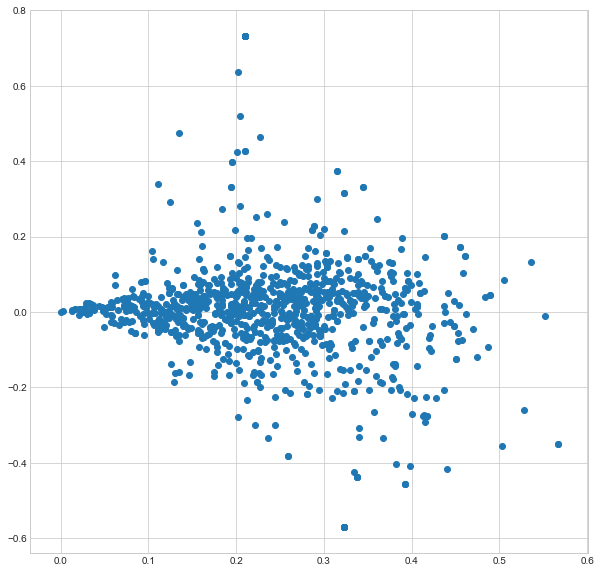

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(result[:, 0], result[:, 1])

In [41]:
df = pd.read_csv("/Users/Akashgupta/Desktop/NEWERFIN/disser/MASTER.csv")

In [133]:
data = df[['customers', 'performance', 'appearance_price', 'brand', 'LABELS', 'SCORE']]

In [134]:
data.head()

,customers,performance,appearance_price,brand,LABELS,SCORE
0,1,1,1,DELL,pos,1
1,1,1,1,DELL,pos,1
2,1,0,0,DELL,neg,-5
3,1,1,1,DELL,pos,1
4,1,1,1,DELL,pos,9


In [135]:
data2 = pd.concat([data, pd.get_dummies(data['brand'])], axis=1)

In [52]:
#ydat = pd.qcut(data2['SCORE'], 3, labels=['negative', 'neutral', 'positive'])

In [136]:
data2

,customers,performance,appearance_price,brand,LABELS,SCORE,DELL,HP,LEN,MAC
0,1,1,1,DELL,pos,1,1,0,0,0
1,1,1,1,DELL,pos,1,1,0,0,0
2,1,0,0,DELL,neg,-5,1,0,0,0
3,1,1,1,DELL,pos,1,1,0,0,0
4,1,1,1,DELL,pos,9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1428,0,0,1,MAC,neg,0,0,0,0,1
1429,0,0,1,MAC,pos,3,0,0,0,1
1430,0,0,1,MAC,pos,4,0,0,0,1
1431,0,0,1,MAC,neg,0,0,0,0,1


In [137]:
data2.to_csv('/Users/Akashgupta/Desktop/newfinal1.csv')

In [61]:
X = data2[['customers', 'performance', 'appearance_price', 'DELL', 'HP', 'LEN', 'MAC']]
Y = data2['LABELS']

In [67]:
le = LabelEncoder()
ydat = le.fit_transform(Y)

In [70]:
X

,customers,performance,appearance_price,DELL,HP,LEN,MAC
0,1,1,1,1,0,0,0
1,1,1,1,1,0,0,0
2,1,0,0,1,0,0,0
3,1,1,1,1,0,0,0
4,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...
1428,0,0,1,0,0,0,1
1429,0,0,1,0,0,0,1
1430,0,0,1,0,0,0,1
1431,0,0,1,0,0,0,1


In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, ydat, test_size=0.4, random_state=42)

In [111]:
clf = cross_val_score(LogisticRegression(solver='liblinear'), x_train, y_train, cv=5)

In [112]:
np.mean(clf)

0.658916811902499

In [113]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, iid=True)
grid.fit(x_train, y_train)
print('best cross val: ', grid.best_score_)

best cross val:  0.6589057043073341


In [115]:
tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=30, max_depth=4, random_state=0)
tree.fit(x_train, y_train)
tree.score(x_test, y_test)

0.6707317073170732

In [130]:
model = SVC(kernel='rbf', C=100, gamma=0.1).fit(x_train, y_train)
model.score(x_test, y_test)

0.6655052264808362